In [ ]:
import matplotlib.pyplot as plt
import keras
from src.resplit import resplit_dataset
from src.load_images import load_images_masks,load_single_mask,load_single_image
from src.plot import display_image_and_mask,plot_metrics
from src.model import unet_model,filter_pixels
from src.f1 import f1_score



In [13]:
data_path: str = "/home/recabet/.cache/kagglehub/datasets/atilol/aerialimageryforroofsegmentation/versions/9"
local_path: str = "/home/recabet/Coding/AerialSegmentation"

In [15]:
resplit_dataset(data_path, local_path)

Resplitting complete! New dataset saved to /home/recabet/Coding/AerialSegmentation


In [16]:
test_path: str = "/home/recabet/Coding/AerialSegmentation/test"
train_path: str = "/home/recabet/Coding/AerialSegmentation/train"
val_path: str = "/home/recabet/Coding/AerialSegmentation/val"

In [17]:
train_images_path = f"{train_path}/images"
val_images_path = f"{val_path}/images"
test_images_path = f"{test_path}/images"
train_labels_path = f"{train_path}/labels"
val_labels_path = f"{val_path}/labels"
test_labels_path = f"{test_path}/labels"


In [20]:
image_97_path: str = f"{train_path}/images/christchurch_97.tif"
image_110_path: str = f"{train_path}/images/christchurch_110.tif"
image_135_path: str = f"{train_path}/images/christchurch_135.tif"
image_210_path: str = f"{train_path}/images/christchurch_210.tif"
image_275_path: str = f"{train_path}/images/christchurch_275.tif"
label_97_path: str = f"{train_path}/labels/christchurch_97_vis.tif"
label_110_path: str = f"{train_path}/labels/christchurch_110_vis.tif"
label_135_path: str = f"{train_path}/labels/christchurch_135_vis.tif"
label_210_path: str = f"{train_path}/labels/christchurch_210_vis.tif"
label_275_path: str = f"{train_path}/labels/christchurch_275_vis.tif"

In [21]:
image_97 = load_single_image(image_97_path)
image_110 = load_single_image(image_110_path)
image_135 = load_single_image(image_135_path)
image_210 = load_single_image(image_210_path)
image_275 = load_single_image(image_275_path)
mask_97 = load_single_mask(label_97_path)
mask_110 = load_single_mask(label_110_path)
mask_135 = load_single_mask(label_135_path)
mask_210 = load_single_mask(label_210_path)
mask_275= load_single_mask(label_275_path)

/home/recabet/anaconda3/lib/python3.12/site-packages/PIL/Image.py:3218: DecompressionBombWarning: Image size (100000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


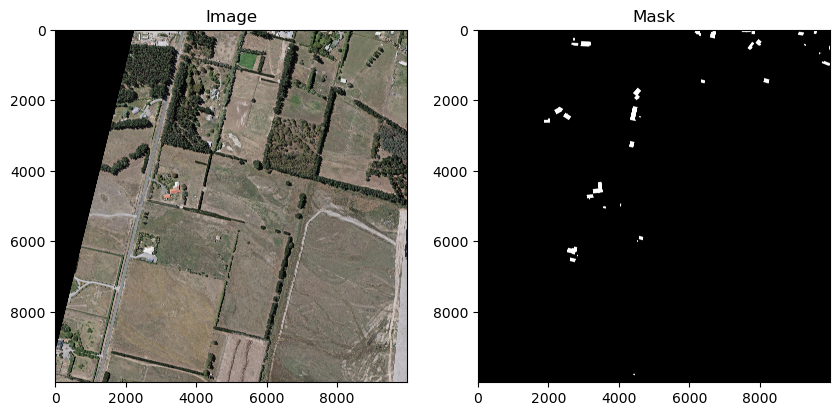

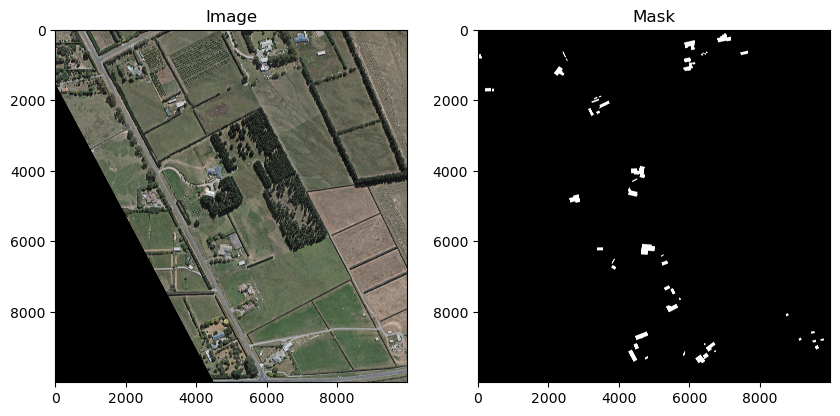

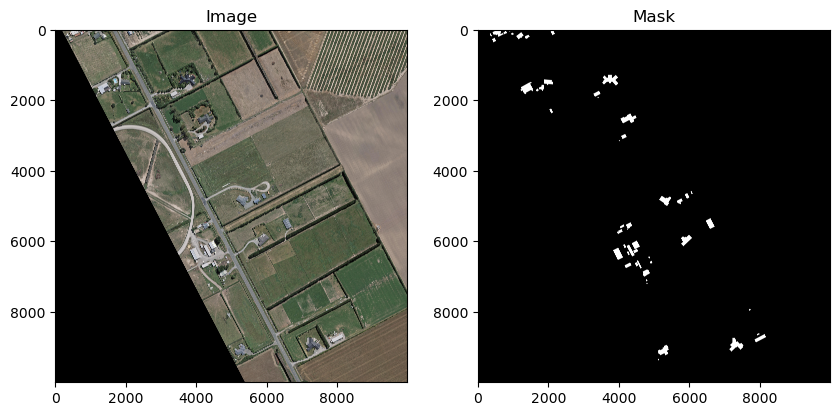

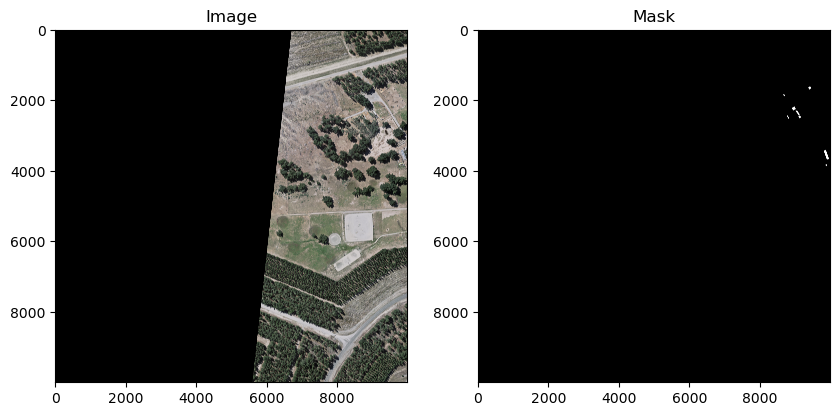

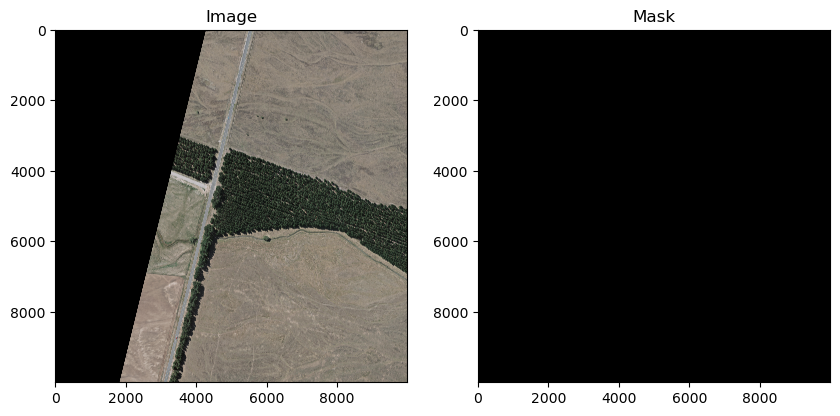

In [23]:
display_image_and_mask(image_97, mask_97)
display_image_and_mask(image_110, mask_110)
display_image_and_mask(image_135, mask_135)
display_image_and_mask(image_210, mask_210)
display_image_and_mask(image_275, mask_275)

In [48]:
train_images, train_labels = load_images_masks(train_images_path, train_labels_path, img_size=(128, 128),remove_black_masks=True)
val_images, val_labels = load_images_masks(val_images_path, val_labels_path, img_size=(128, 128))
test_images, test_labels = load_images_masks(test_images_path, test_labels_path, img_size=(128, 128))

KeyboardInterrupt: 

In [26]:
print("Train Images Shape:", train_images.shape)
print("Train Labels Shape:", train_labels.shape)
print("Test Images Shape:", test_images.shape)
print("Test Labels Shape:", test_labels.shape)
print("Validation Images Shape:", val_images.shape)
print("Validation Labels Shape:", val_labels.shape)

Train Images Shape: (612, 128, 128, 3)
Train Labels Shape: (612, 128, 128, 1)
Test Images Shape: (105, 128, 128, 3)
Test Labels Shape: (105, 128, 128, 1)
Validation Images Shape: (209, 128, 128, 3)
Validation Labels Shape: (209, 128, 128, 1)


In [28]:
callbacks = [
    keras.callbacks.ModelCheckpoint("models/without_aug_model.keras",
                                    save_best_only=True,
                                    monitor="val_loss"),

    keras.callbacks.EarlyStopping(monitor="val_loss",
                                  patience=10,
                                  restore_best_weights=True),

    keras.callbacks.ReduceLROnPlateau(monitor=
                                      "val_loss",
                                      factor=0.2,
                                      patience=5,
                                      verbose=1),
]


model = unet_model((256, 256, 3))

history = model.fit(
    train_images,
    train_labels,
    batch_size=1,
    epochs=10,
    validation_data=(val_images,val_labels),
    callbacks=callbacks
)


2024-11-18 18:57:41.438290: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/10
612/612 ━━━━━━━━━━━━━━━━━━━━ 319s 516ms/step - accuracy: 0.9099 - binary_io_u: 0.4565 - loss: 0.5492 - precision: 0.1279 - recall: 9.6073e-04 - val_accuracy: 0.9305 - val_binary_io_u: 0.5067 - val_loss: 0.1656 - val_precision: 0.6672 - val_recall: 0.0844 - learning_rate: 0.0010
Epoch 2/10
612/612 ━━━━━━━━━━━━━━━━━━━━ 314s 513ms/step - accuracy: 0.9095 - binary_io_u: 0.5134 - loss: 0.2165 - precision: 0.5784 - recall: 0.1264 - val_accuracy: 0.9361 - val_binary_io_u: 0.5646 - val_loss: 0.1541 - val_precision: 0.7049 - val_recall: 0.2077 - learning_rate: 0.0010
Epoch 3/10
612/612 ━━━━━━━━━━━━━━━━━━━━ 310s 507ms/step - accuracy: 0.9163 - binary_io_u: 0.5742 - loss: 0.1979 - precision: 0.6458 - recall: 0.2645 - val_accuracy: 0.9389 - val_binary_io_u: 0.6352 - val_loss: 0.1560 - val_precision: 0.6215 - val_recall: 0.4159 - learning_rate: 0.0010
Epoch 4/10
612/612 ━━━━━━━━━━━━━━━━━━━━ 297s 485ms/step - accuracy: 0.9224 - binary_io_u: 0.6143 - loss: 0.1796 - precision: 0.6707 - reca

In [29]:
test_results = model.evaluate(test_images, test_labels)

4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.9447 - binary_io_u: 0.6955 - loss: 0.1331 - precision: 0.8173 - recall: 0.4949


In [88]:
predictions=model.predict(test_images)

4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step


In [89]:
threshold:float = 0.3
filter_pixels(threshold, predictions)

In [50]:
precision = history.history.get('precision', [])
recall = history.history.get('recall', [])
accuracy = history.history.get('accuracy', [])
iou = history.history.get('binary_io_u', [])
loss=history.history.get('loss', [])
val_precision = history.history.get('val_precision', [])
val_recall = history.history.get('val_recall', [])
val_accuracy = history.history.get('val_accuracy', [])
val_iou = history.history.get('val_binary_io_u', [])
val_loss=history.history.get('val_loss', [])

f1 = f1_score(precision, recall)
val_f1 = f1_score(val_precision, val_recall)


In [51]:
print(f"train f1: {f1[9]}")
print(f"val f1: {val_f1[9]}")

train f1: 0.6374243225150312
val f1: 0.6370991718166743


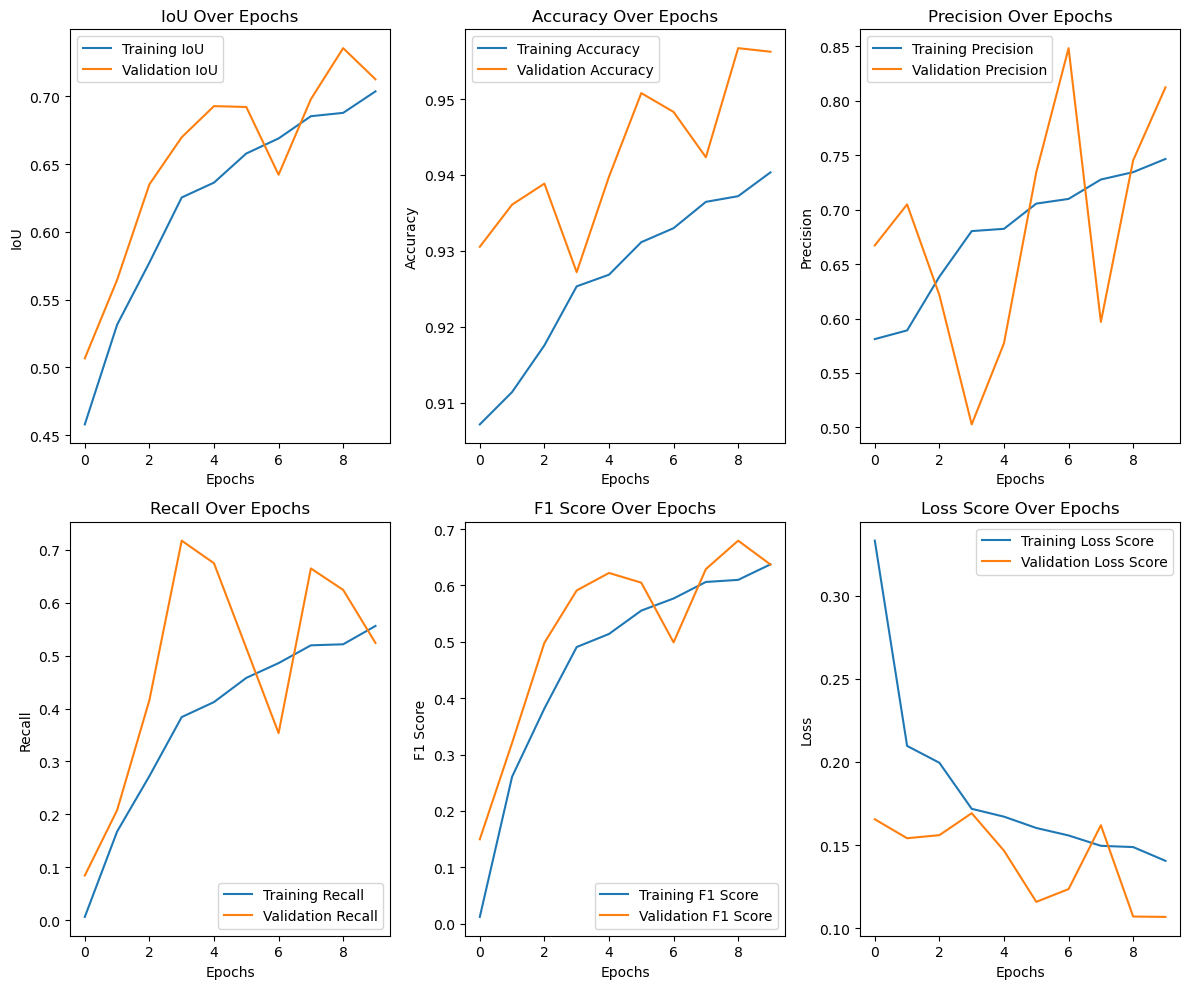

In [45]:
plot_metrics(iou,
            val_iou,
            accuracy,
            val_accuracy,
            precision,
            val_precision,
            recall,
            val_recall,
            f1,
            val_f1,
            loss,
            val_loss)

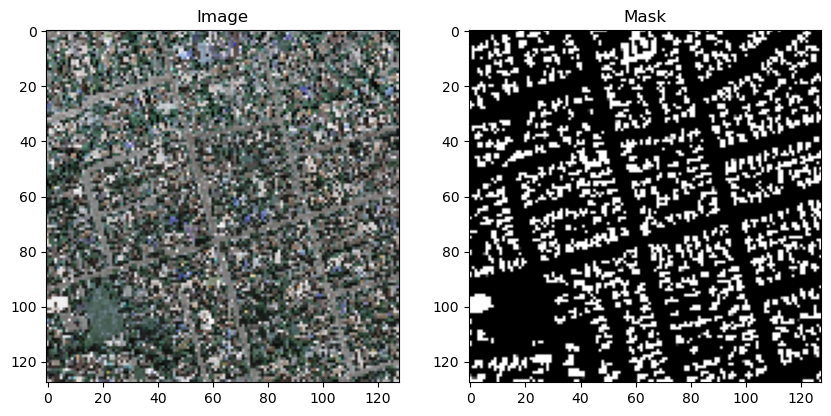

Text(0.5, 1.0, 'Model Prediction')

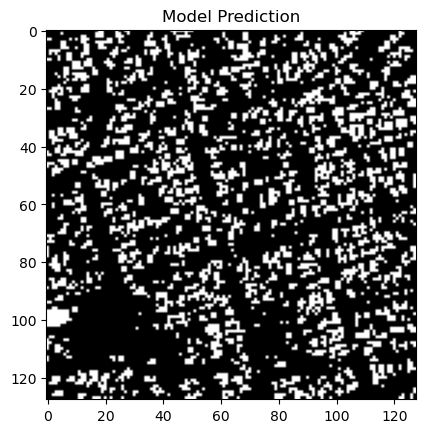

In [90]:
display_image_and_mask(test_images[0],test_labels[0])
plt.imshow(predictions[0],cmap='gray')
plt.title('Model Prediction')

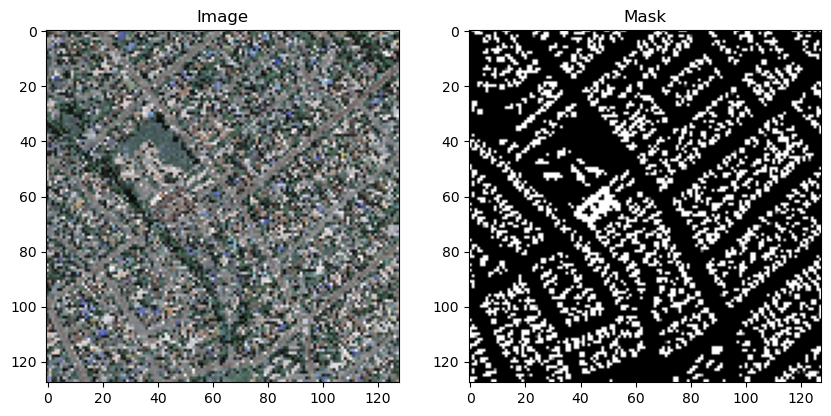

Text(0.5, 1.0, 'Model Prediction')

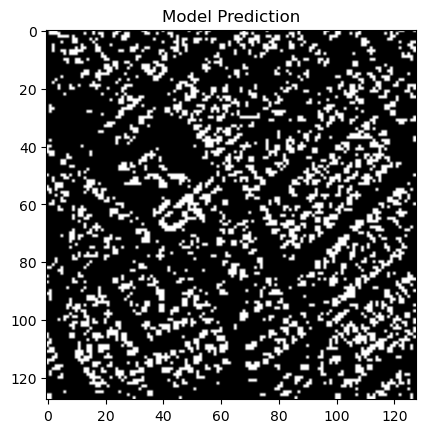

In [91]:
display_image_and_mask(test_images[1],test_labels[1])
plt.imshow(predictions[1],cmap='gray')
plt.title('Model Prediction')

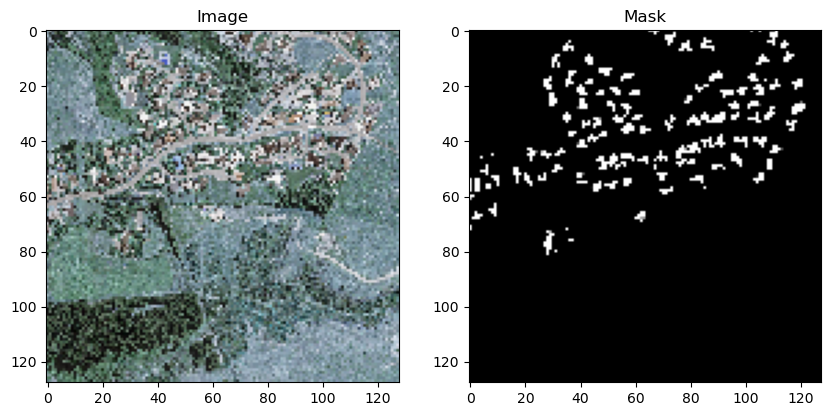

Text(0.5, 1.0, 'Model Prediction')

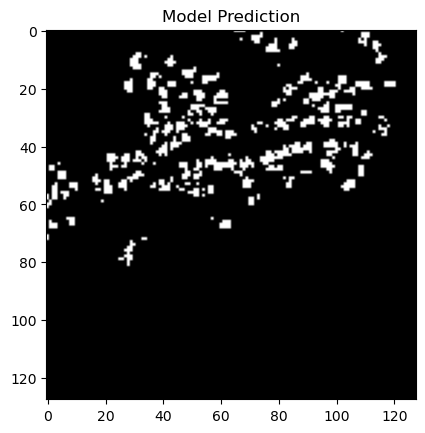

In [92]:
display_image_and_mask(test_images[2],test_labels[2])
plt.imshow(predictions[2],cmap='gray')
plt.title('Model Prediction')

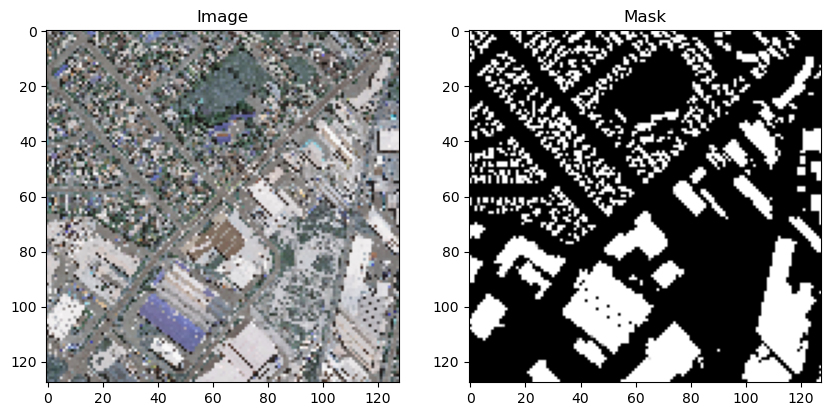

Text(0.5, 1.0, 'Model Prediction')

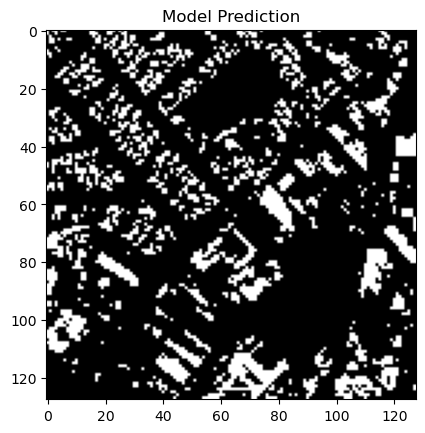

In [93]:
display_image_and_mask(test_images[3],test_labels[3])
plt.imshow(predictions[3],cmap='gray')
plt.title('Model Prediction')

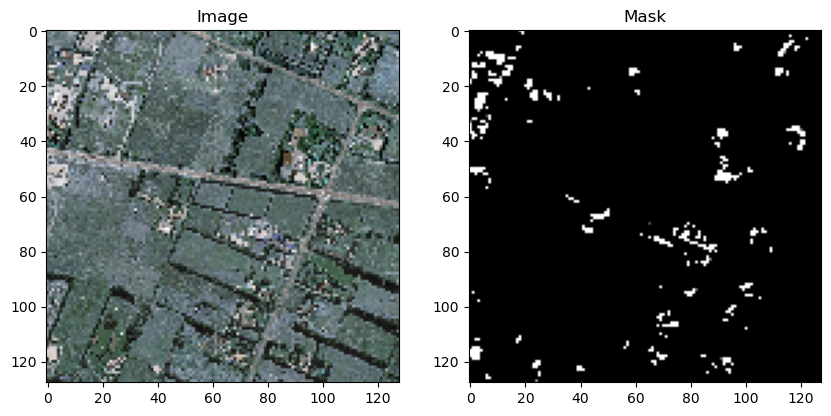

Text(0.5, 1.0, 'Model Prediction')

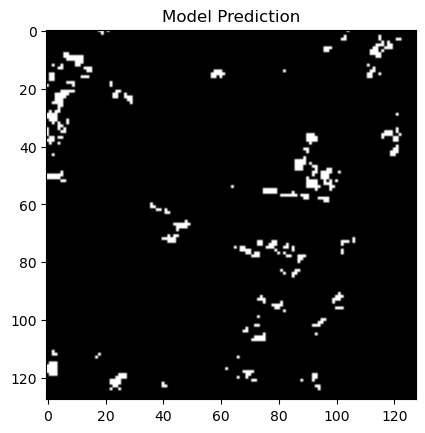

In [94]:
display_image_and_mask(test_images[4],test_labels[4])
plt.imshow(predictions[4],cmap='gray')
plt.title('Model Prediction')

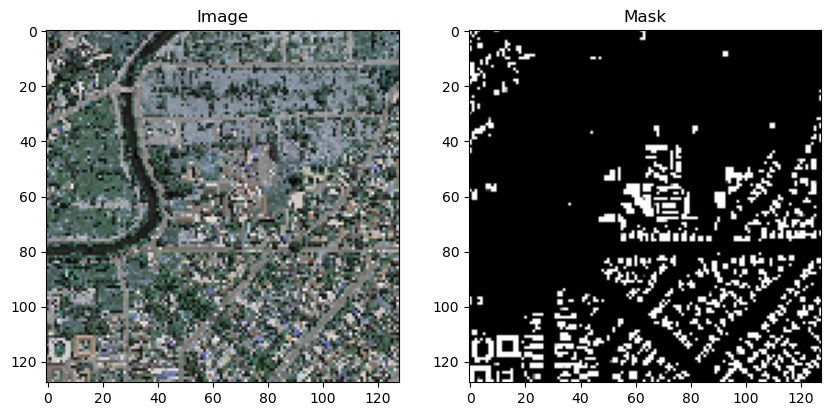

Text(0.5, 1.0, 'Model Prediction')

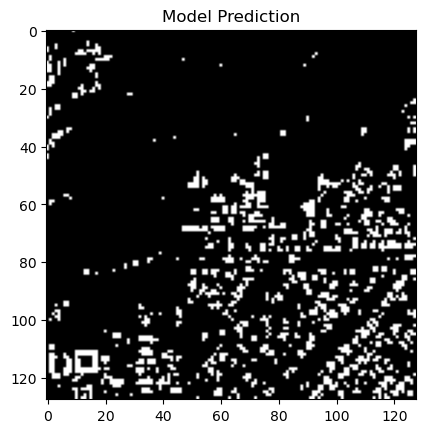

In [95]:
display_image_and_mask(test_images[5],test_labels[5])
plt.imshow(predictions[5],cmap='gray')
plt.title('Model Prediction')